### Trajectory analysis of Myocardial Infarction using PILOT

<div class="alert alert-block alert-info">
<b>PILOT</b>

Welcome to the PILOT Package Tutorial for scRNA Data!

Here we show the whole process for applying PILOT to scRNA data using Myocardial Infarction scRNA Data, you can download the Anndata (h5ad) file from [here](https://costalab.ukaachen.de/open_data/PILOT/myocardial_infarction.h5ad).

</div>

In [1]:
import PILOT as pl
import scanpy as sc

##### Reading Anndata

In [2]:
adata=sc.read_h5ad('Datasets/myocardial_infarction.h5ad')

###### Loading the required information and computing the Wasserstein distance:
<div class="alert alert-block alert-info"> In order to work with PILOT, ensure that your Anndata object is loaded and contains the required information.
    
Use the following parameters to configure PILOT for your analysis (Setting Parameters):
    
adata: Pass your loaded Anndata object to PILOT.
    
emb_matrix: Provide the name of the variable in the obsm level that holds the dimension reduction (PCA representation).
    
clusters_col: Specify the name of the column in the observation level of your Anndata that corresponds to cell types or clusters.
    
sample_col: Indicate the column name in the observation level of your Anndata that contains information about samples or patients.
    
status: Provide the column name that represents the status or disease (e.g., "control" or "case").
       
</div>

In [3]:
pl.tl.wasserstein_distance(adata,emb_matrix='PCA',
clusters_col='cell_subtype',sample_col='sampleID',status='Status')

##### Ploting the Cost matrix and the Wasserstein distance:
<div class="alert alert-block alert-info"> 
 Here we show the heatmaps of Cost matrix (cells) and Wasserstein distance (samples).      
</div>

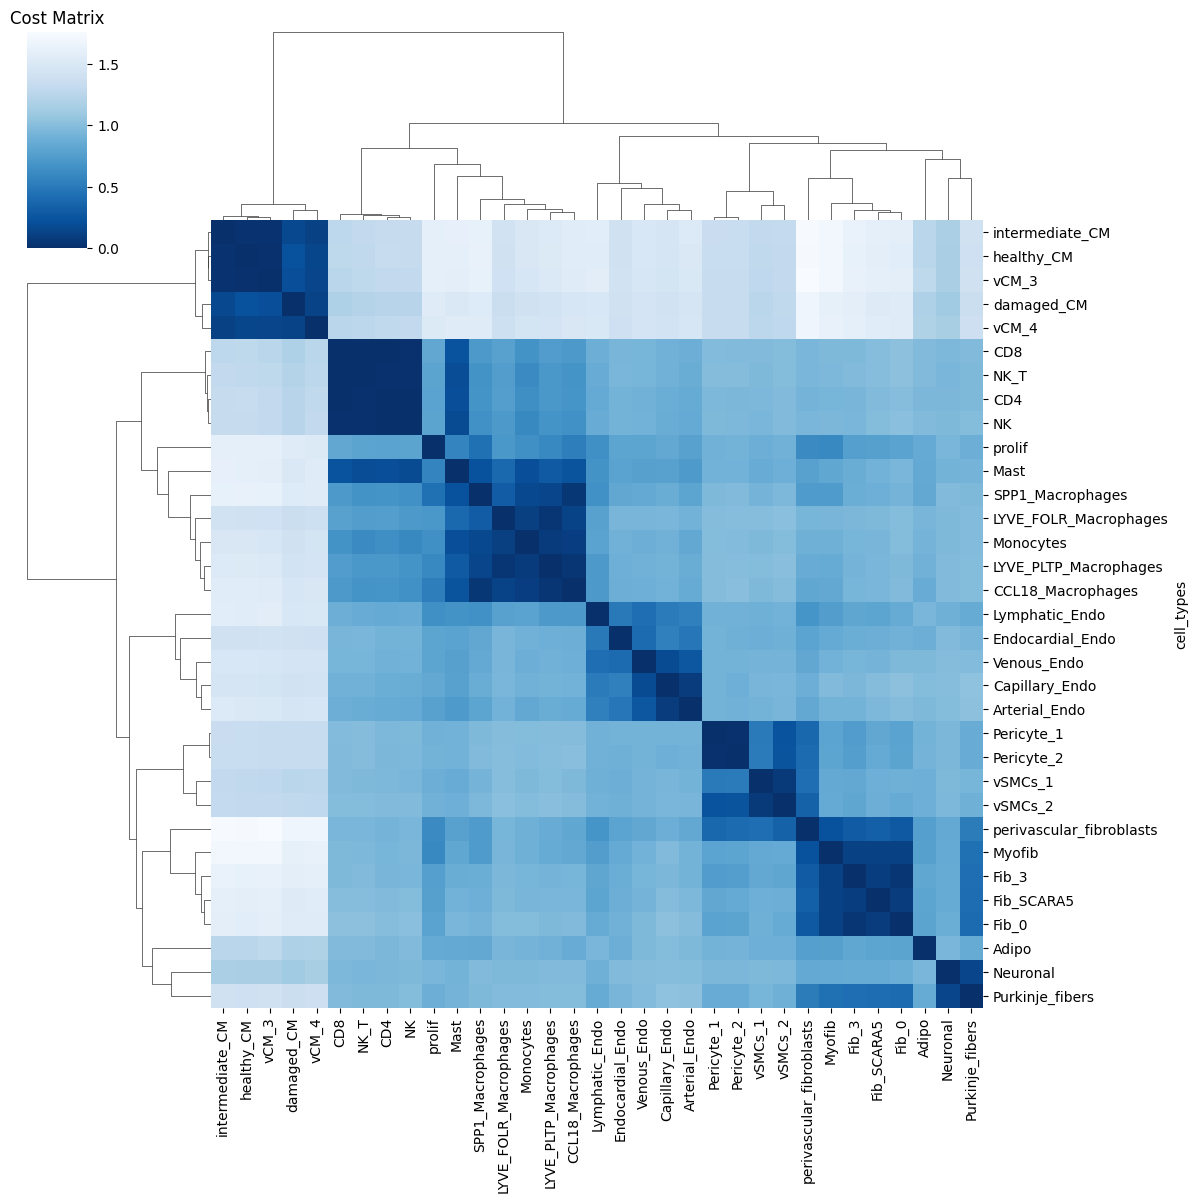

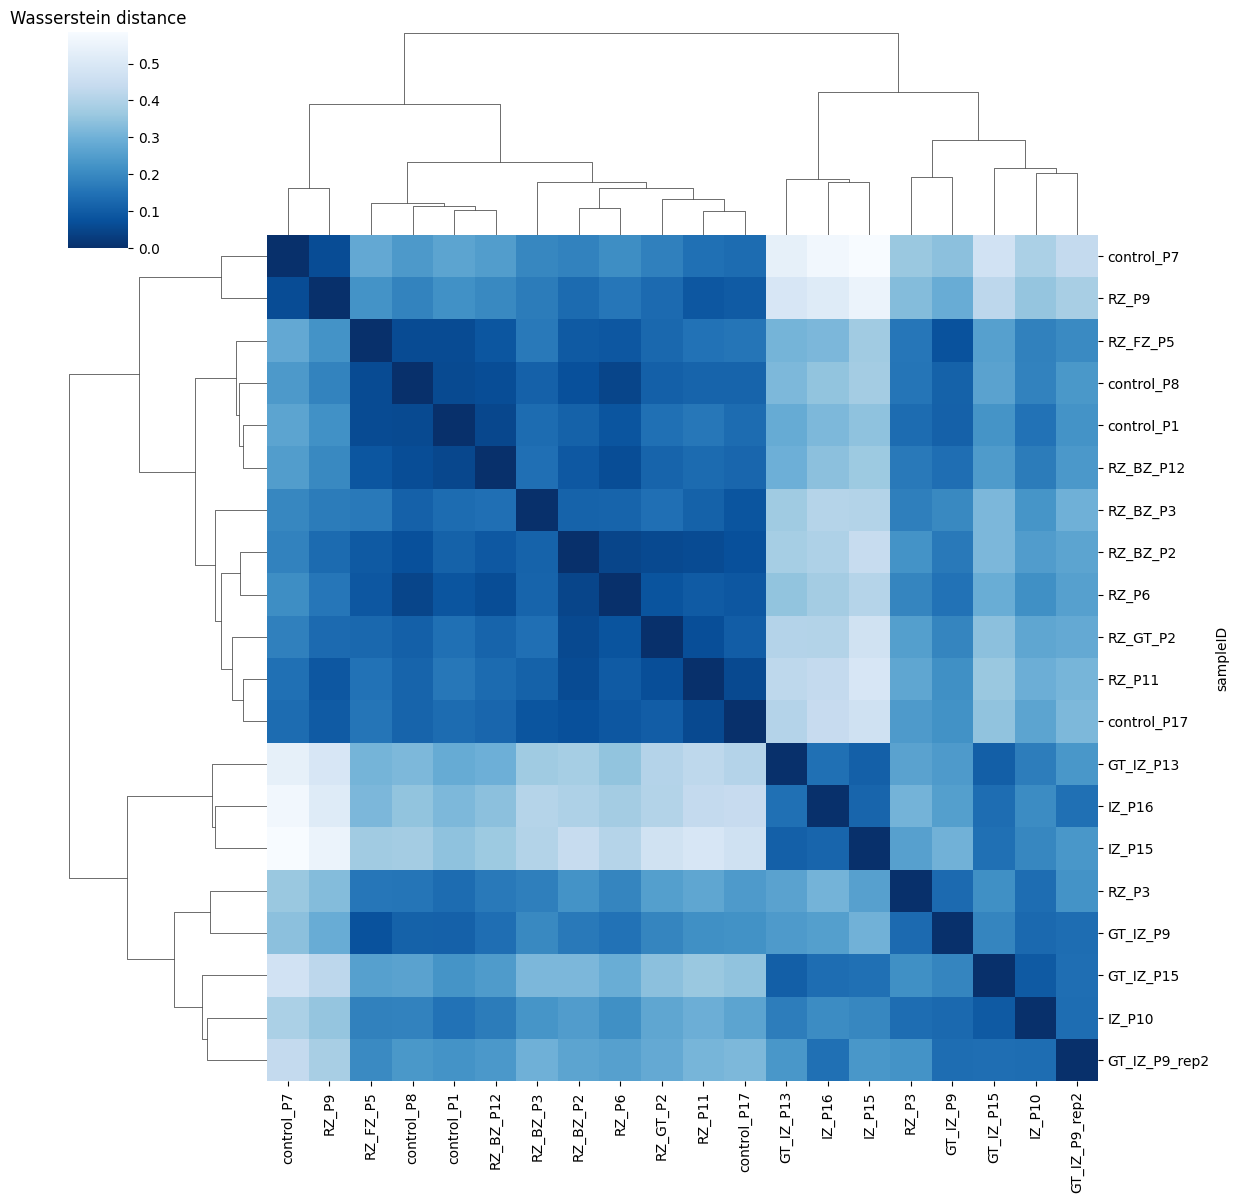

In [4]:
pl.pl.heatmaps(adata)

##### Trajectory:
<div class="alert alert-block alert-info"> 
 Here we show the Diffusion map of Wasserstein distance.
</div>

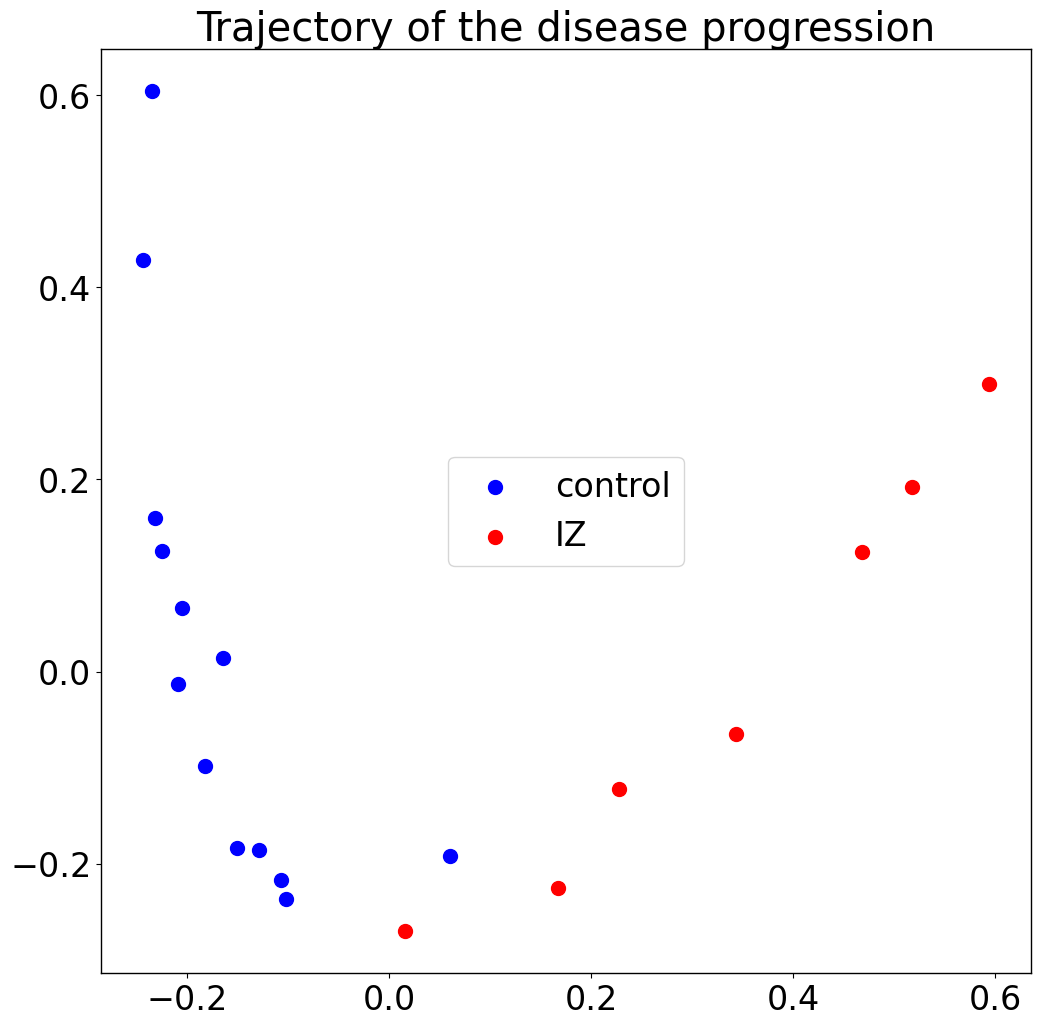

In [5]:
pl.pl.trajectory(adata,colors=['Blue','red'])

#####  Fit a principal graph:
<div class="alert alert-block alert-info"> 
The difussion map creates an embeding that potentially reveals a trajectory in the data. Next, PILOT explores EIPLGraph to find the structure of the trajectory. An important parameter is the source_node, which indicate the start of the trajectory. Here, we selected a control sample. This method returns a rank samples, which we define as a disease progression score (t = t1, ..., tn), where tl represents the ranking of the nth sample.
</div>


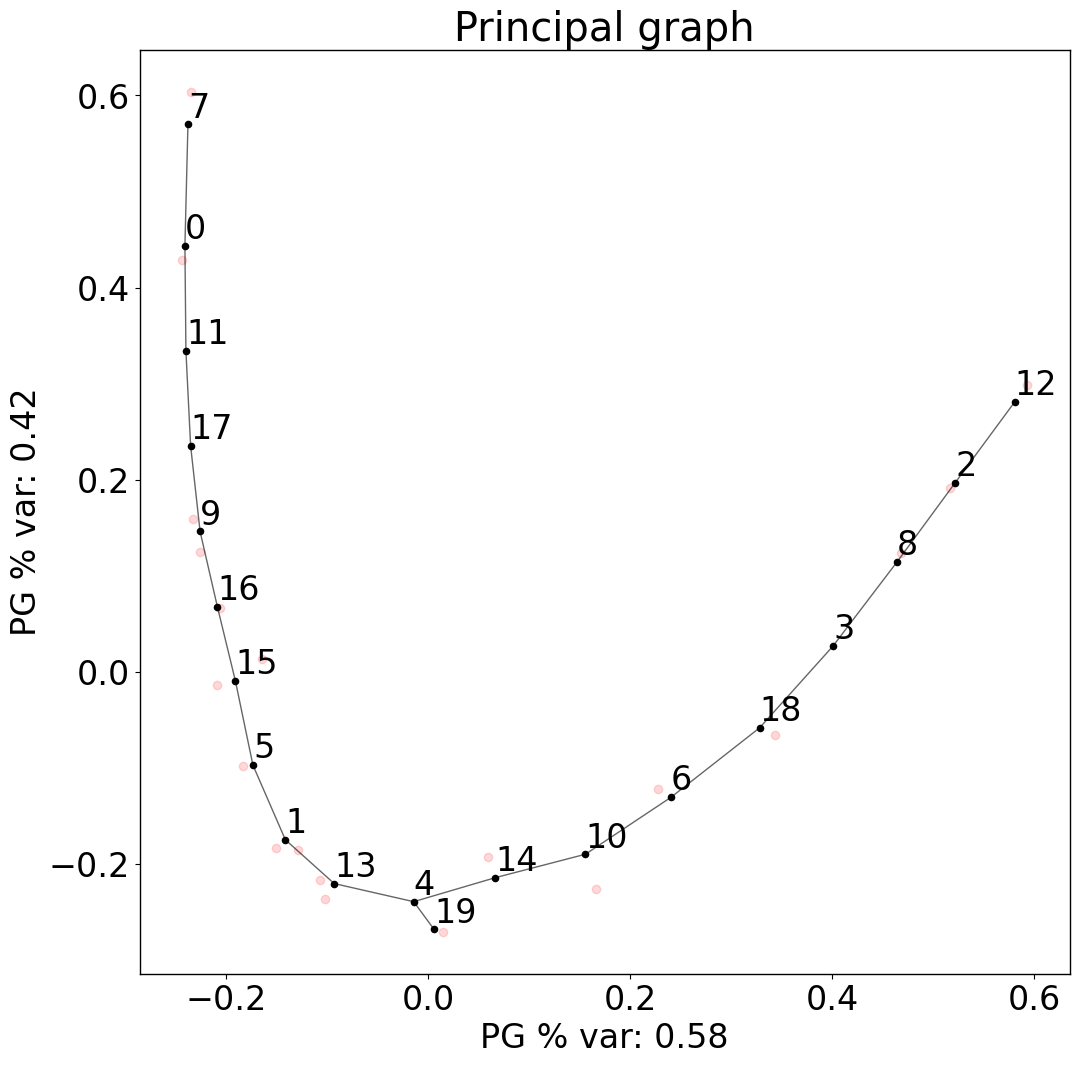

In [6]:
pl.pl.fit_pricipla_graph(adata,source_node=7)

#####  Cell-type importance:
<div class="alert alert-block alert-info"> 
Next, we can use the robust regression model to find cells whose proportions change linearly or non-linearly with disease progression. As indicated in the paper, major halmarks of MI progression are detected, i.e., a decrease of cardiomyocyte cells (CM) and an increase of fibroblasts and myeloid cells.
</div>

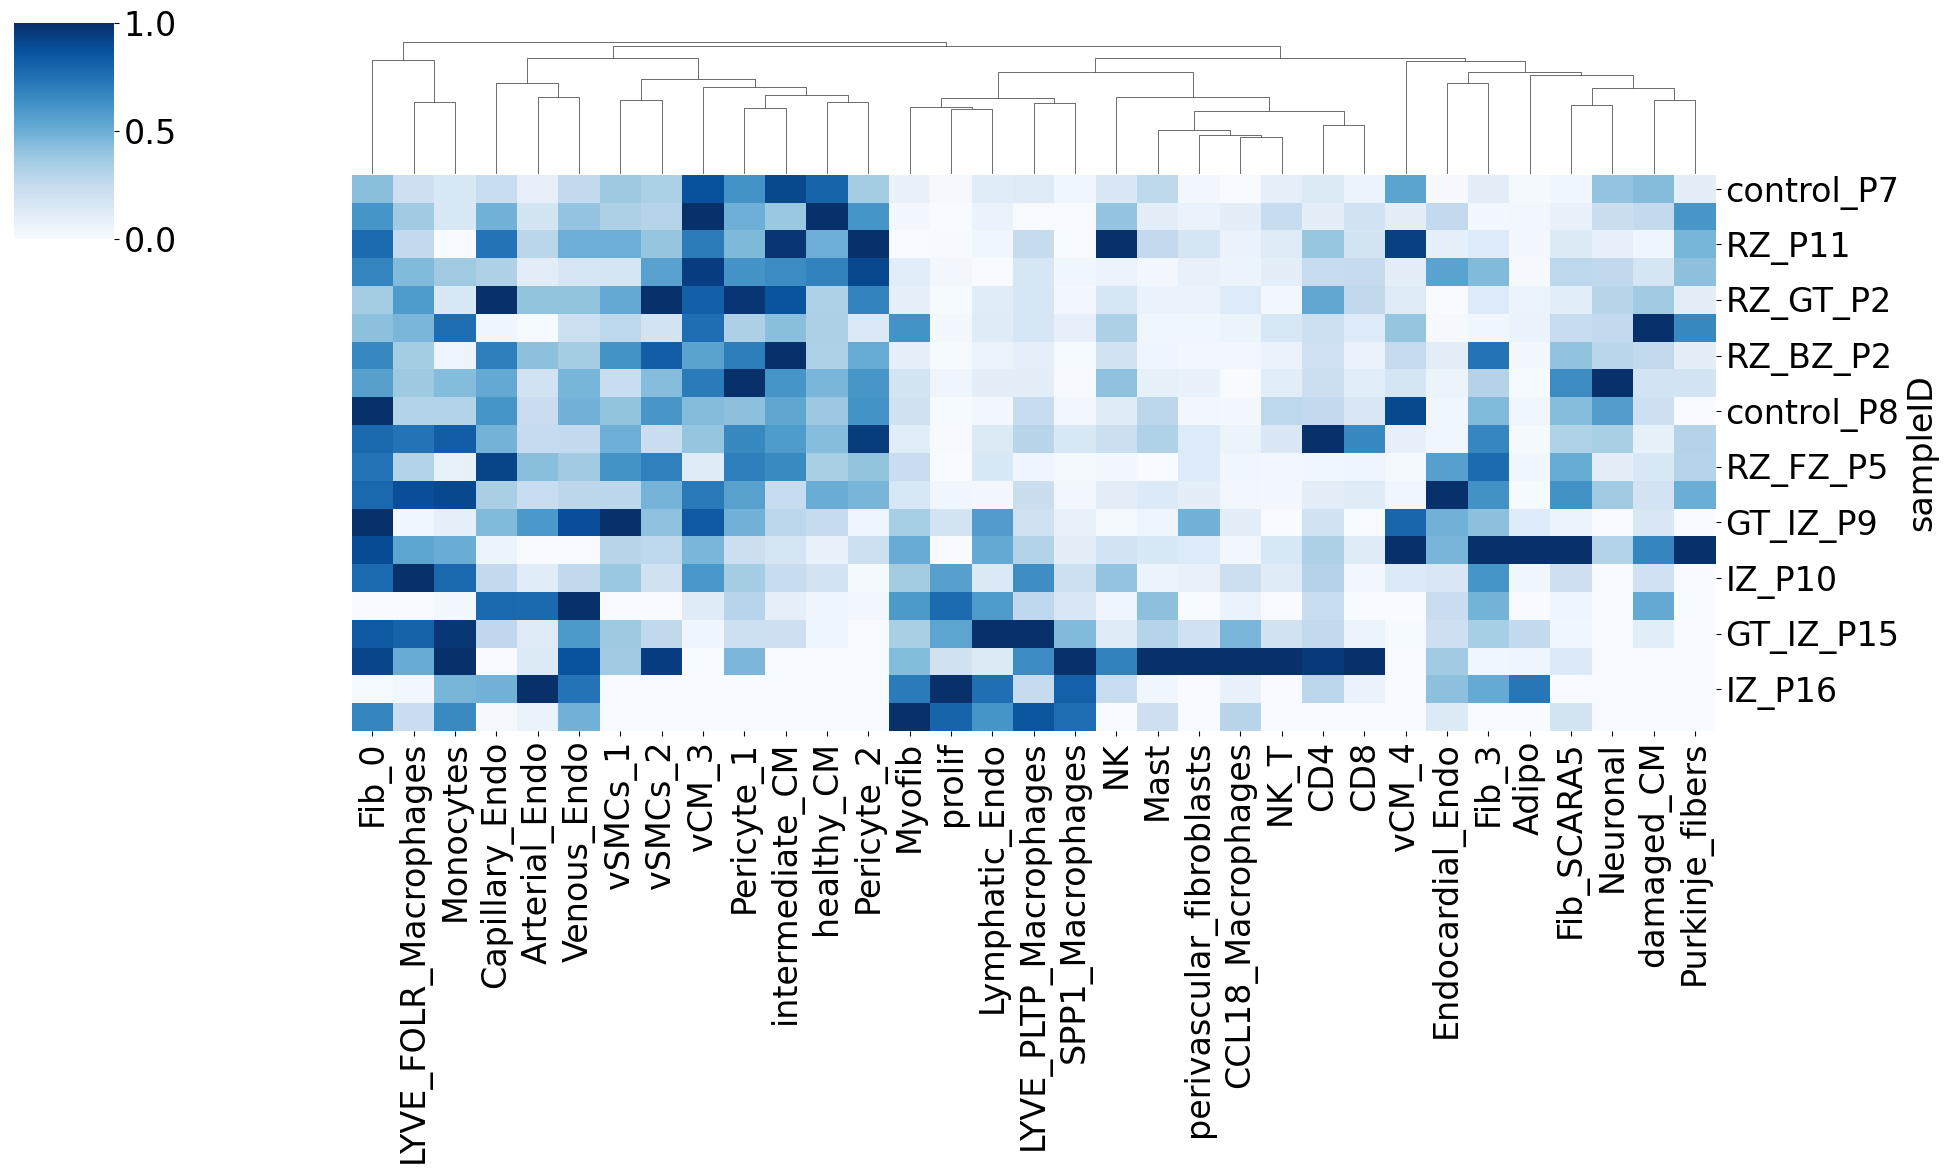

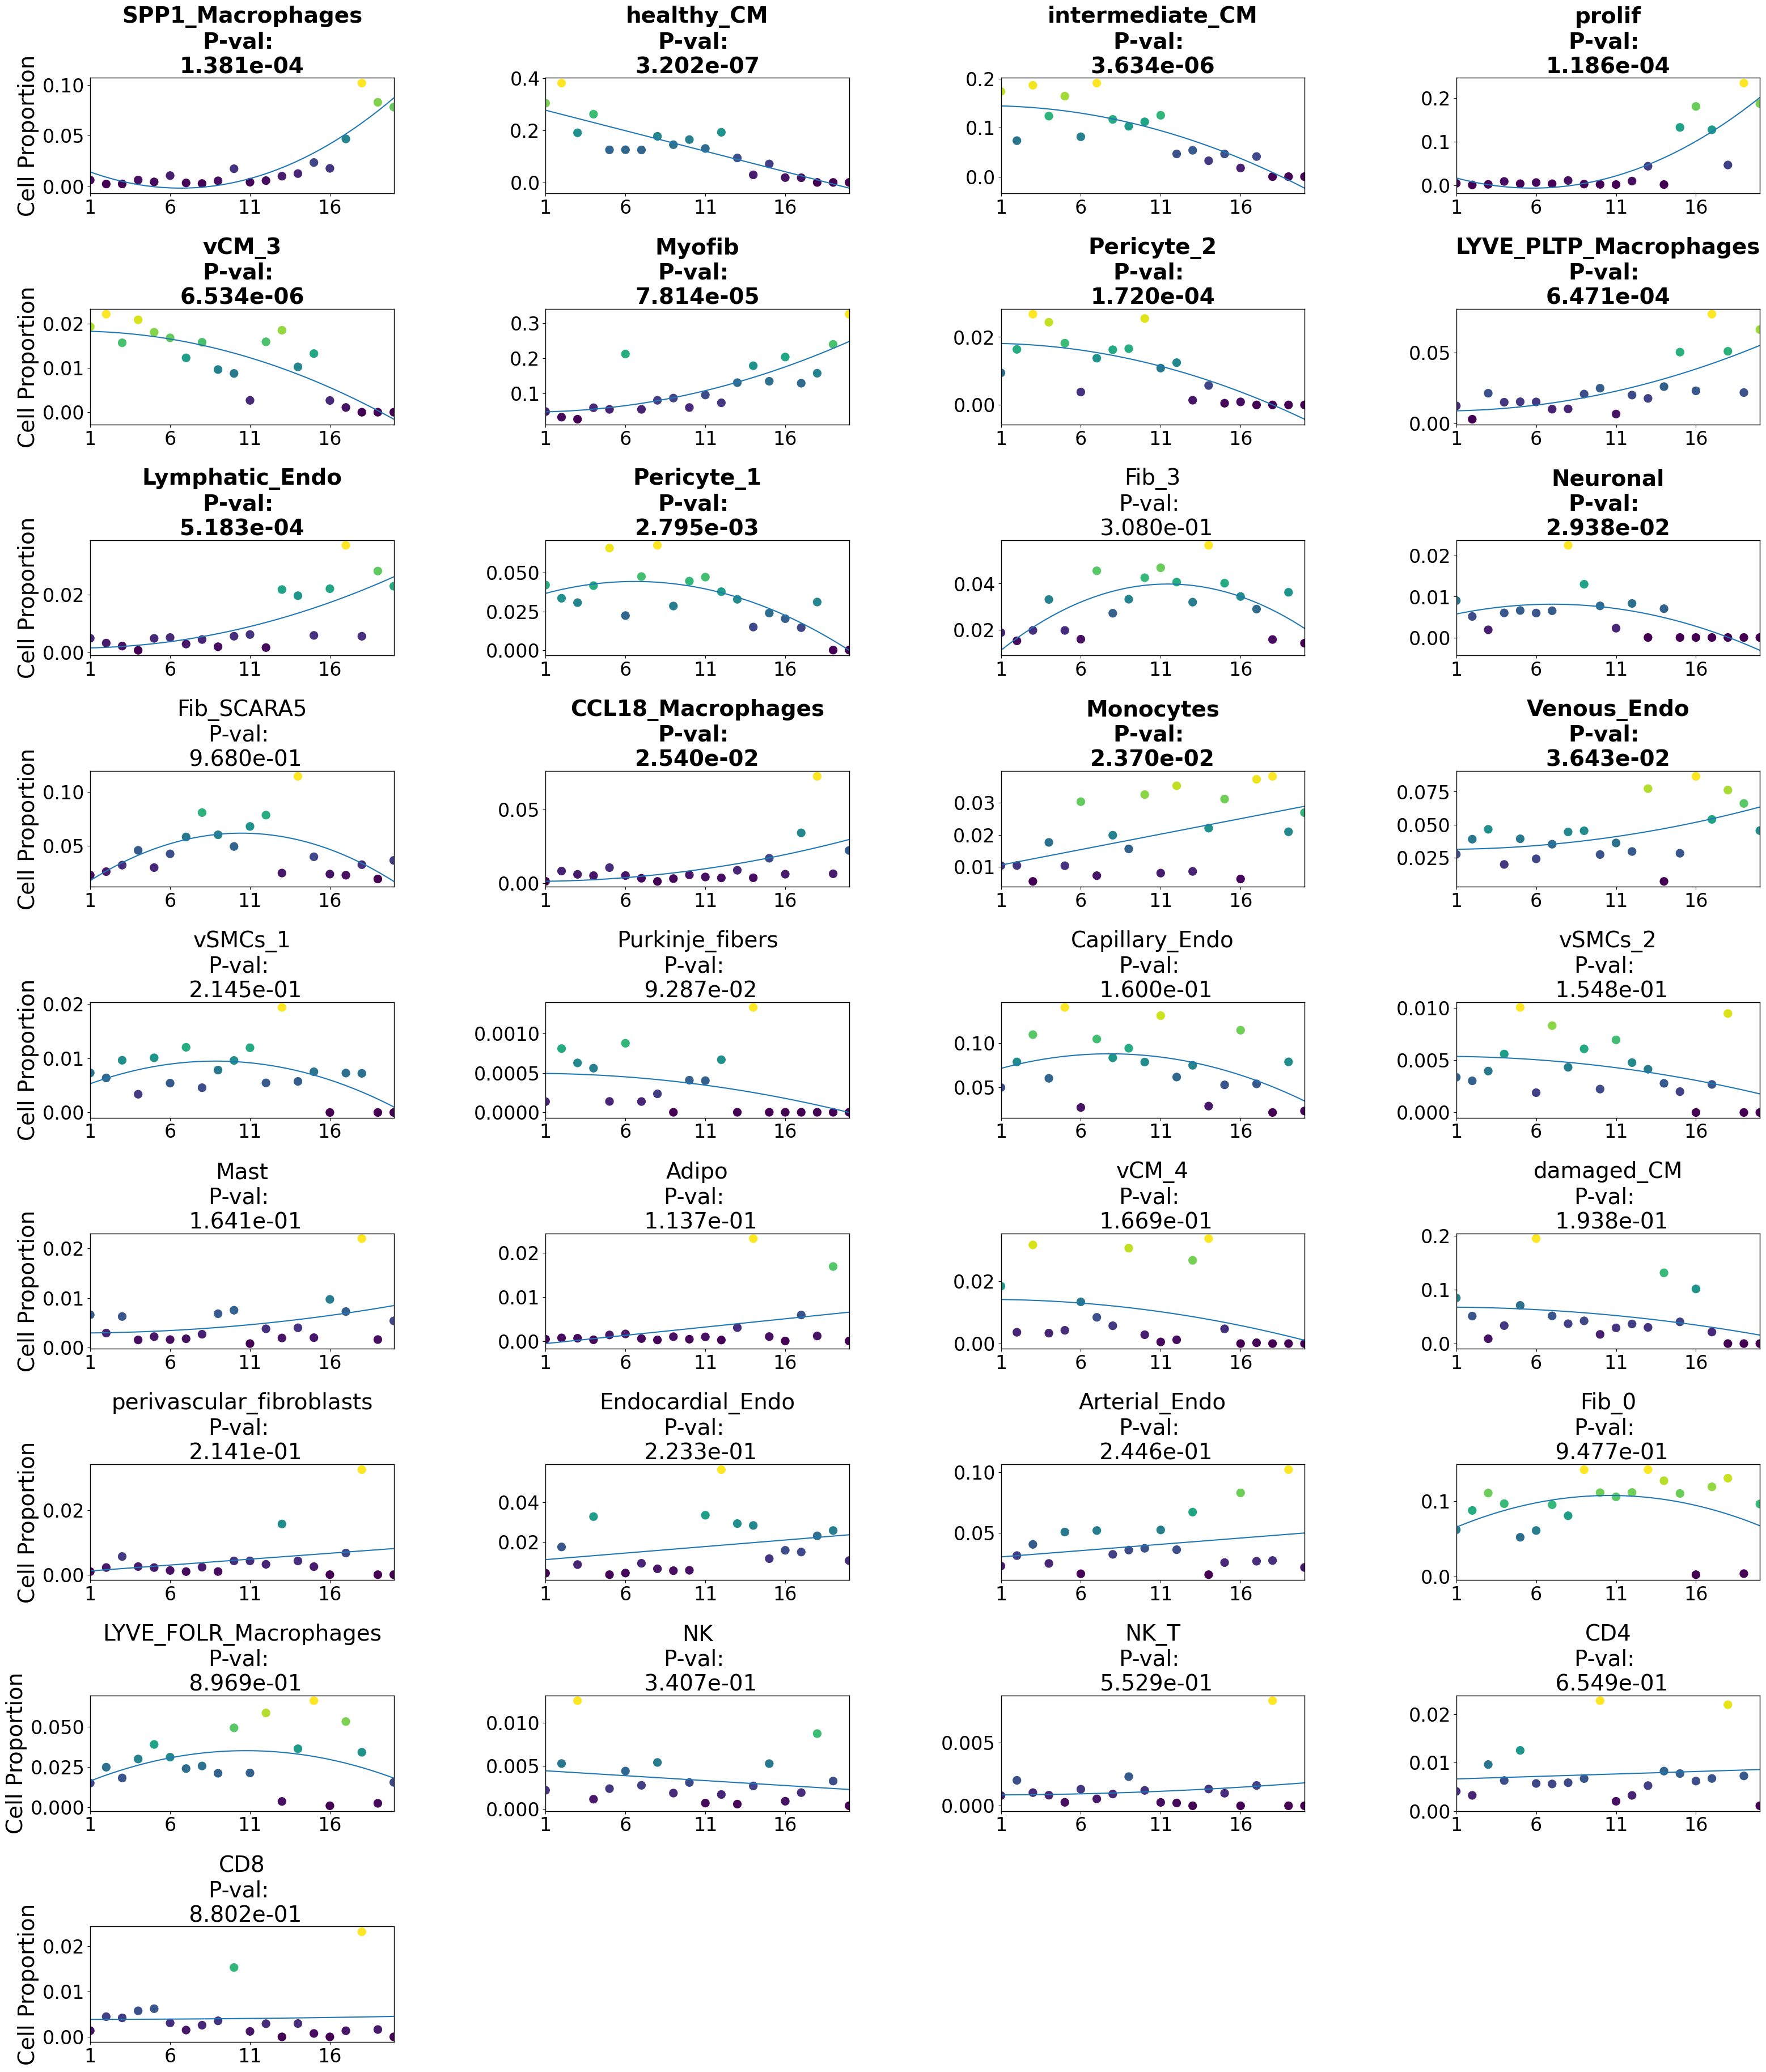

In [7]:
pl.tl.cell_importance(adata,height=45,width=38,fontsize=28)

##### Applyin PILOT for finding Markers

##### Gene selection:
<div class="alert alert-block alert-info"> 
Given that we found interesting cell types, we would like next to investigate genes associated with these trajectories, i.e. genes, which expression changes linear or quadratically with the disease progression. After running the command, you can find a folder named ‘Markers’. There, we will have a folder for each cell type. The file ‘Whole_expressions.csv’ contains all statistics associated with genes for that cell type. Here, we run the genes_importance function for whole cell types.
    
* You need to set names of columns that show cell_types/clusters and Samples/Patinets in your object.
</div>

In [8]:
for cell in adata.uns['cellnames']:
    pl.tl.genes_importance(adata,name_cell=cell,sample_col='sampleID',col_cell='cell_subtype',plot_genes=False)

##### Cluster Specific Marker Changes:
<div class="alert alert-block alert-info"> 
The previous test, only finds genes with significant changes over time for a given cell type. However, it does not consider if a similar pattern and expression values are found in other clusters. To further select genes, we use a Wald test that compares the fit of the gene in the cluster vs. the fit of the gene in other clusters.
In the code below, we consider top genes (regarding the regression fit) for two interesting cell types discussed in the manuscript (‘healthy CM’ and ‘Myofib’).
</div>

In [12]:
pl.tl.gene_cluster_differentiation(cellnames=['healthy_CM','Myofib'],number_genes=70)

In [18]:
pl.pl.plt_gene_cluster_differentiation(cellnames=['healthy_CM','Myofib'],font_size=20)

<Figure size 8000x8000 with 0 Axes>

<Figure size 8000x8000 with 0 Axes>


<div class="alert alert-block alert-info"> 
Test results are saved in ‘gene_clusters_stats_extend.csv’ and plots are saved at “plots_gene_cluster_differentiation”. To find a final list of genes, we only consider genes with a fold change higher than 0.5, i.e. genes which expression is increased in the cluster at hand; and we sort the genes based on the Wald test p-value. These can be seen bellow.
</div>

In [19]:
df=pl.tl.results_gene_cluster_differentiation(cluster_name='Myofib').head(50)
df.head(15)

gene cluster    waldStat         pvalue        FC  \
5845    RORA  Myofib  726.167859  4.443328e-157  0.940741   
2673    GAS7  Myofib  405.944093   1.141824e-87  0.927879   
6418  SRSF11  Myofib   97.018608   6.799134e-21  0.865734   
5027  PKNOX2  Myofib   78.876085   5.346793e-17  0.855504   
2876     GSN  Myofib   38.588189   2.121753e-08  0.633831   
1282    CHD9  Myofib   33.359494   2.704617e-07  0.566664   
2518     FN1  Myofib   27.507285   4.608276e-06  1.573680   
1488  COL6A3  Myofib   23.179833   3.704328e-05  1.069156   
5983  SEC24D  Myofib   18.968725   2.775001e-04  0.812640   
1881     DST  Myofib   16.720179   8.068366e-04  0.509683   
3869     MGP  Myofib   14.382736   2.427875e-03  0.838889   
1443  COL3A1  Myofib   13.488091   3.691628e-03  1.240454   
1423  COL1A2  Myofib   13.174701   4.273640e-03  1.327753   
2138    EXT1  Myofib   13.100268   4.424713e-03  0.570081   
1712     DCN  Myofib    9.286334   2.571648e-02  1.137701   

            Expression pattern     fit-pvalue  fit-mod-rsquared  
5845            quadratic down  7.232834e-174          0.587234  
2673  linear up quadratic down  1.873033e-107          0.570704  
6418  linear down quadratic up   2.897170e-83          0.540767  
5027            quadratic down  1.039404e-117          0.544122  
2876  linear up quadratic down  2.942472e-279          0.601684  
1282  linear up quadratic down   7.658862e-77          0.559604  
2518  linear down quadratic up  2.947389e-188          0.633774  
1488  linear down quadratic up  3.514298e-172          0.608543  
5983  linear down quadratic up   6.604860e-64          0.522700  
1881  linear down quadratic up   5.705082e-10          0.559501  
3869            quadratic down  1.327779e-225          0.571374  
1443  linear down quadratic up   0.000000e+00          0.665616  
1423  linear down quadratic up   0.000000e+00          0.655032  
2138  linear up quadratic down   3.159831e-35          0.555757  
1712  linear up quadratic down  1.866152e-284          0.588602

<div class="alert alert-block alert-info"> 
Plots of genes are saved at 'plot_genes_for_Myofib' folder. We can also vizualise specfici genes, for example the ones discussed in PILOT manuscript (COL1A2, DCN and EXT1). In the plot, the orange line indicates the fit in the target cell type (shown as orange lines) compared to other cell types (represented by grey lines).
</div>

<Figure size 8000x8000 with 0 Axes>

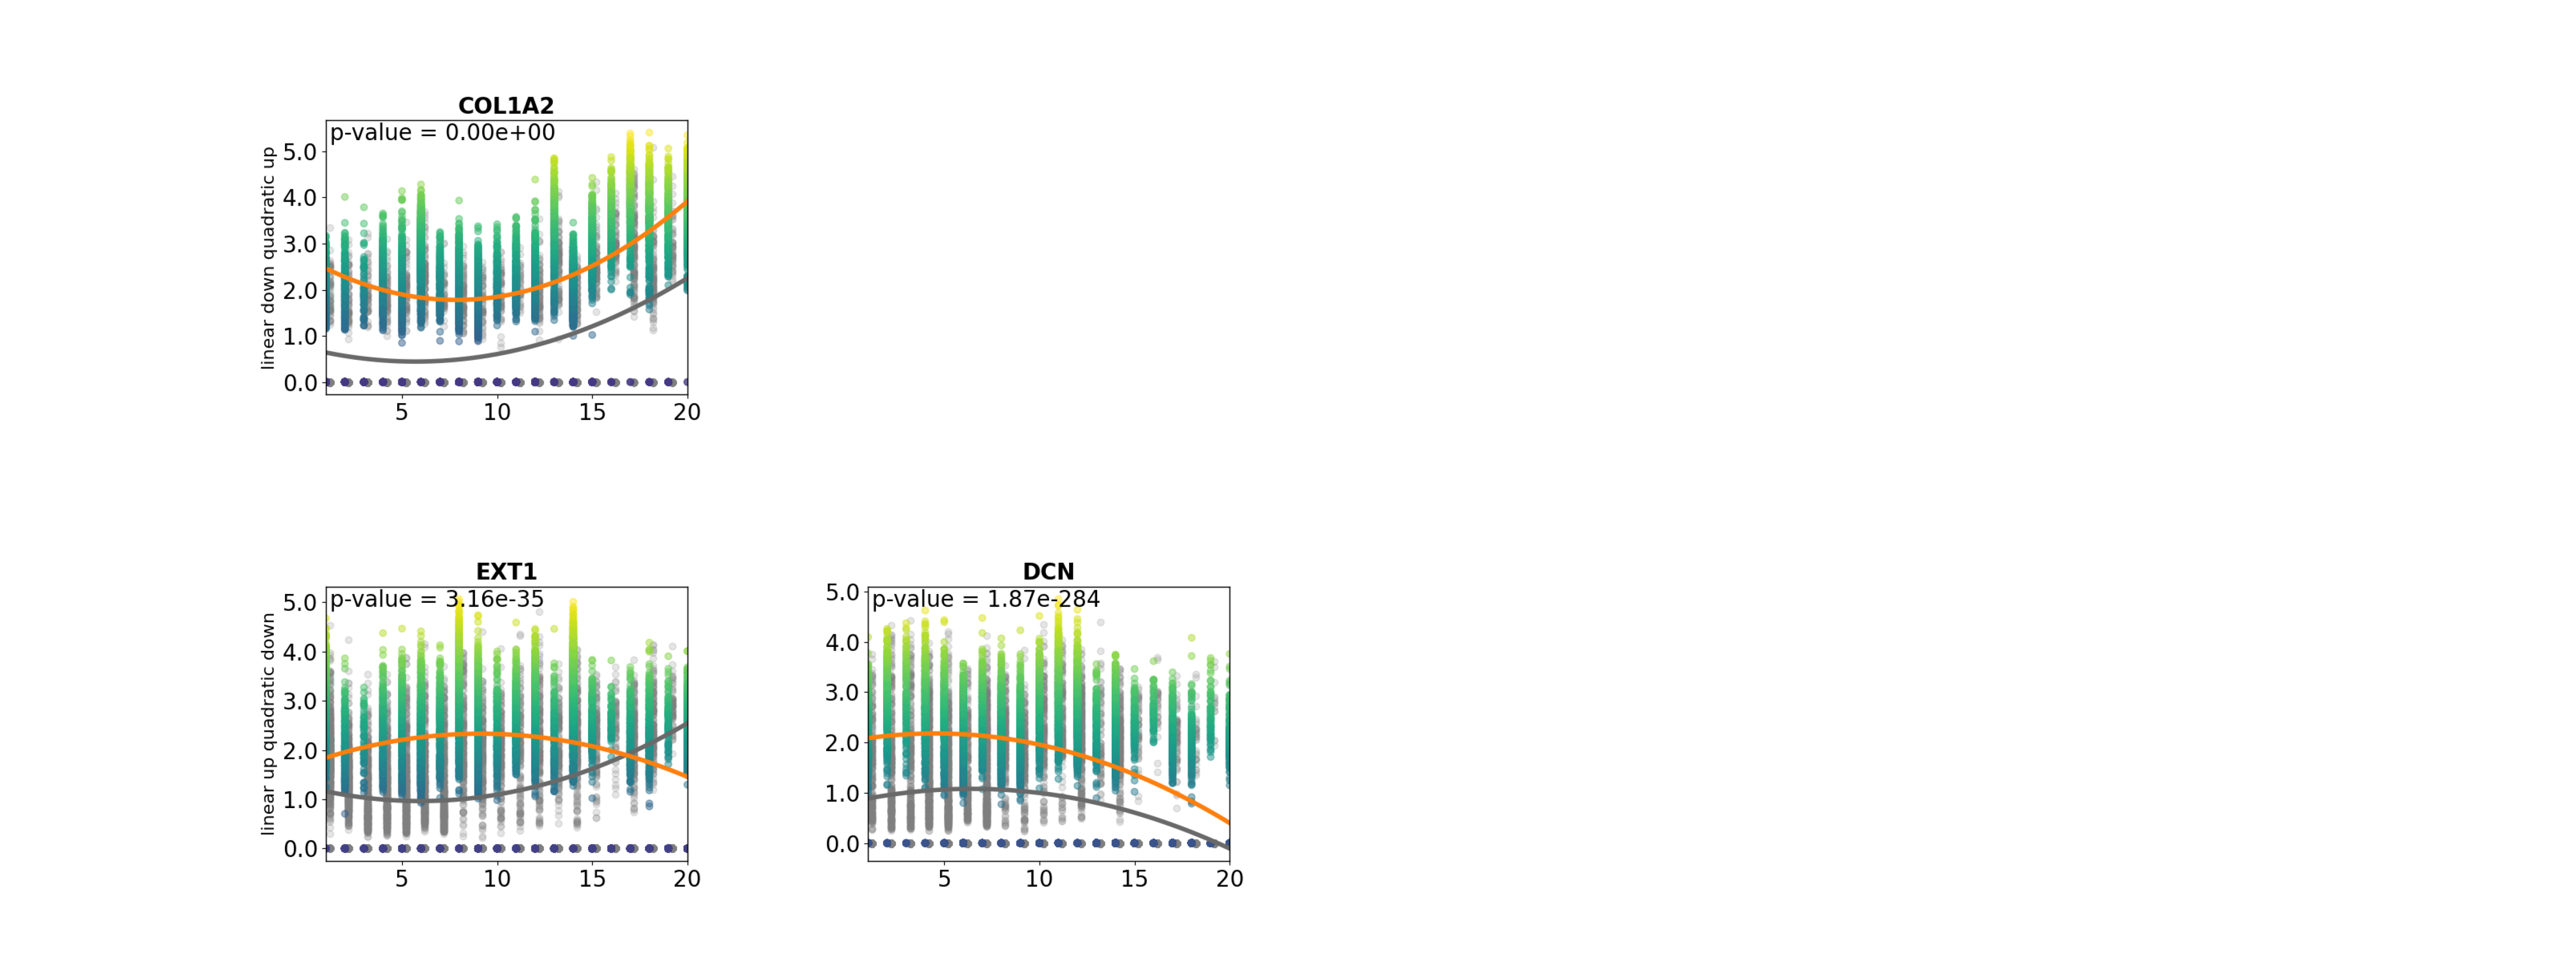

In [20]:
pl.pl.exploring_specific_genes(cluster_name='Myofib',font_size=20,gene_list=['COL1A2','DCN','EXT1'])

<div class="alert alert-block alert-info"> 
Here is the GO enrichment for 50 the first top genes for Myofib.
</div>

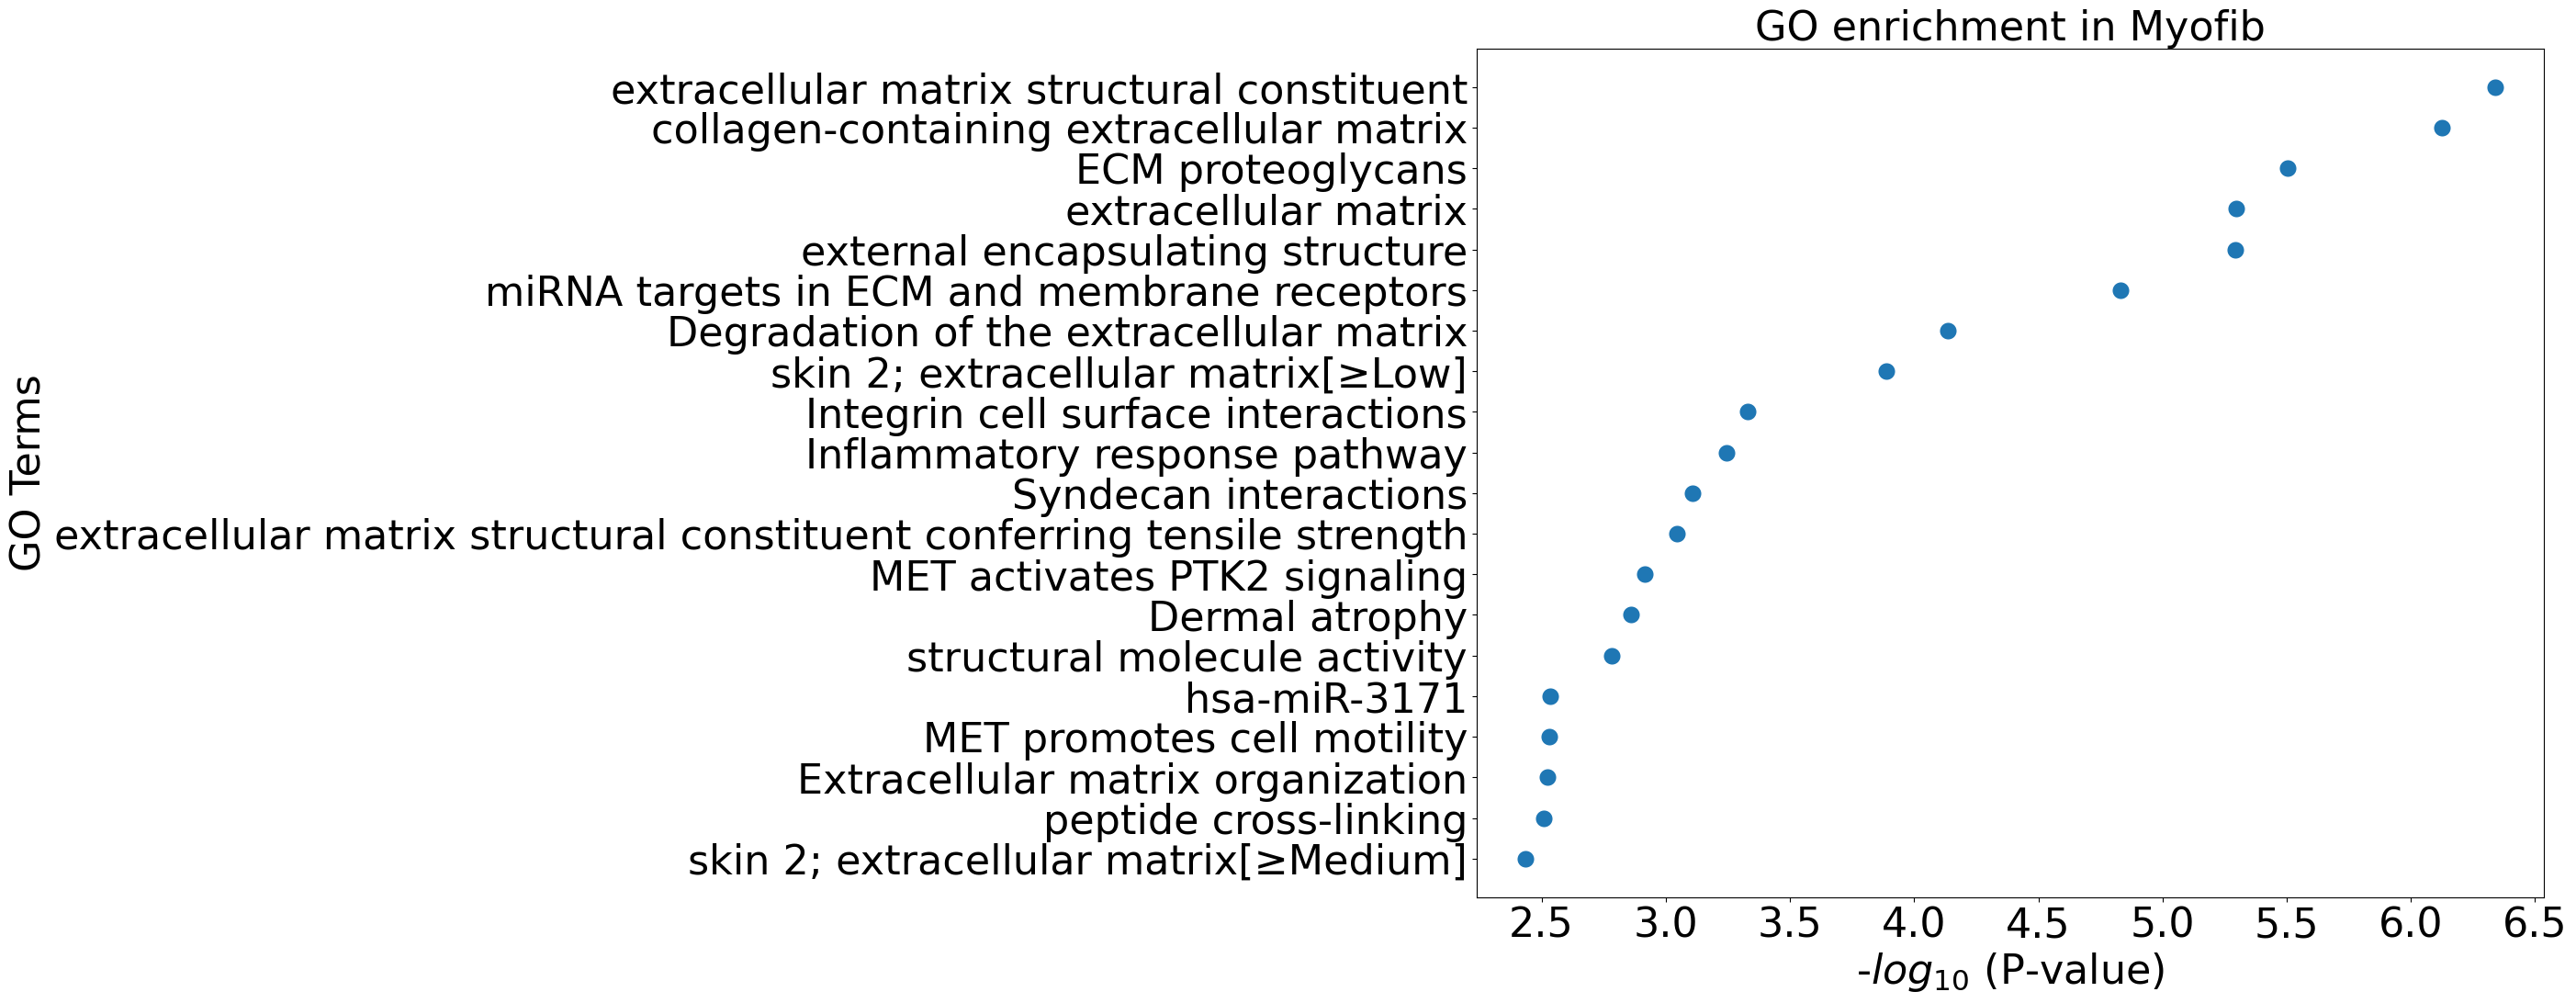

In [21]:
pl.pl.go_enrichment(df,cell_type='Myofib')

<div class="alert alert-block alert-info"> 
We can repeate the same analysis for healthy_CM cell type by using the following commands.
</div>

In [22]:
df=pl.tl.results_gene_cluster_differentiation(cluster_name='healthy_CM').head(50)
df.head(15)

gene     cluster      waldStat  pvalue        FC  \
7527   ZSWIM6  healthy_CM  10732.437845     0.0  2.439606   
755      BRAF  healthy_CM  11070.052527     0.0  2.784995   
6357    SRPK2  healthy_CM   2899.114236     0.0  2.343306   
6244   SORBS1  healthy_CM   2038.349722     0.0  1.828163   
1444   COL4A2  healthy_CM   2697.352511     0.0  1.928972   
1564    CPNE5  healthy_CM   7898.219297     0.0  2.928602   
1582    CREB5  healthy_CM  14355.325817     0.0  3.577095   
1659     CUX1  healthy_CM  11836.217139     0.0  2.296052   
1688     DAB1  healthy_CM   2333.703271     0.0  3.148011   
2520   FNDC3A  healthy_CM   2999.657669     0.0  2.638358   
2613    FRMD5  healthy_CM   6497.378414     0.0  1.279514   
3185    KDM2A  healthy_CM   3498.453036     0.0  2.095851   
3269  L3MBTL4  healthy_CM   6616.669429     0.0  2.849918   
3334  LDLRAD4  healthy_CM   1950.046140     0.0  1.231544   
4942   PDLIM3  healthy_CM   3489.299461     0.0  3.290811   

            Expression pattern     fit-pvalue  fit-mod-rsquared  
7527  linear down quadratic up   3.203533e-07          0.539056  
755   linear down quadratic up  1.651067e-154          0.572363  
6357  linear down quadratic up   4.902958e-02          0.529040  
6244  linear down quadratic up  5.178918e-179          0.560146  
1444  linear down quadratic up   5.469598e-47          0.547734  
1564  linear down quadratic up   0.000000e+00          0.765984  
1582  linear down quadratic up  2.412752e-295          0.669214  
1659  linear down quadratic up   2.555804e-16          0.584346  
1688  linear down quadratic up   0.000000e+00          0.645854  
2520  linear down quadratic up   1.411204e-18          0.541994  
2613    linear up quadratic up  3.445313e-286          0.543240  
3185  linear down quadratic up   7.834409e-04          0.519640  
3269  linear down quadratic up   0.000000e+00          0.643816  
3334  linear down quadratic up  4.568236e-276          0.567330  
4942  linear down quadratic up  2.326237e-257          0.589730

<Figure size 8000x8000 with 0 Axes>

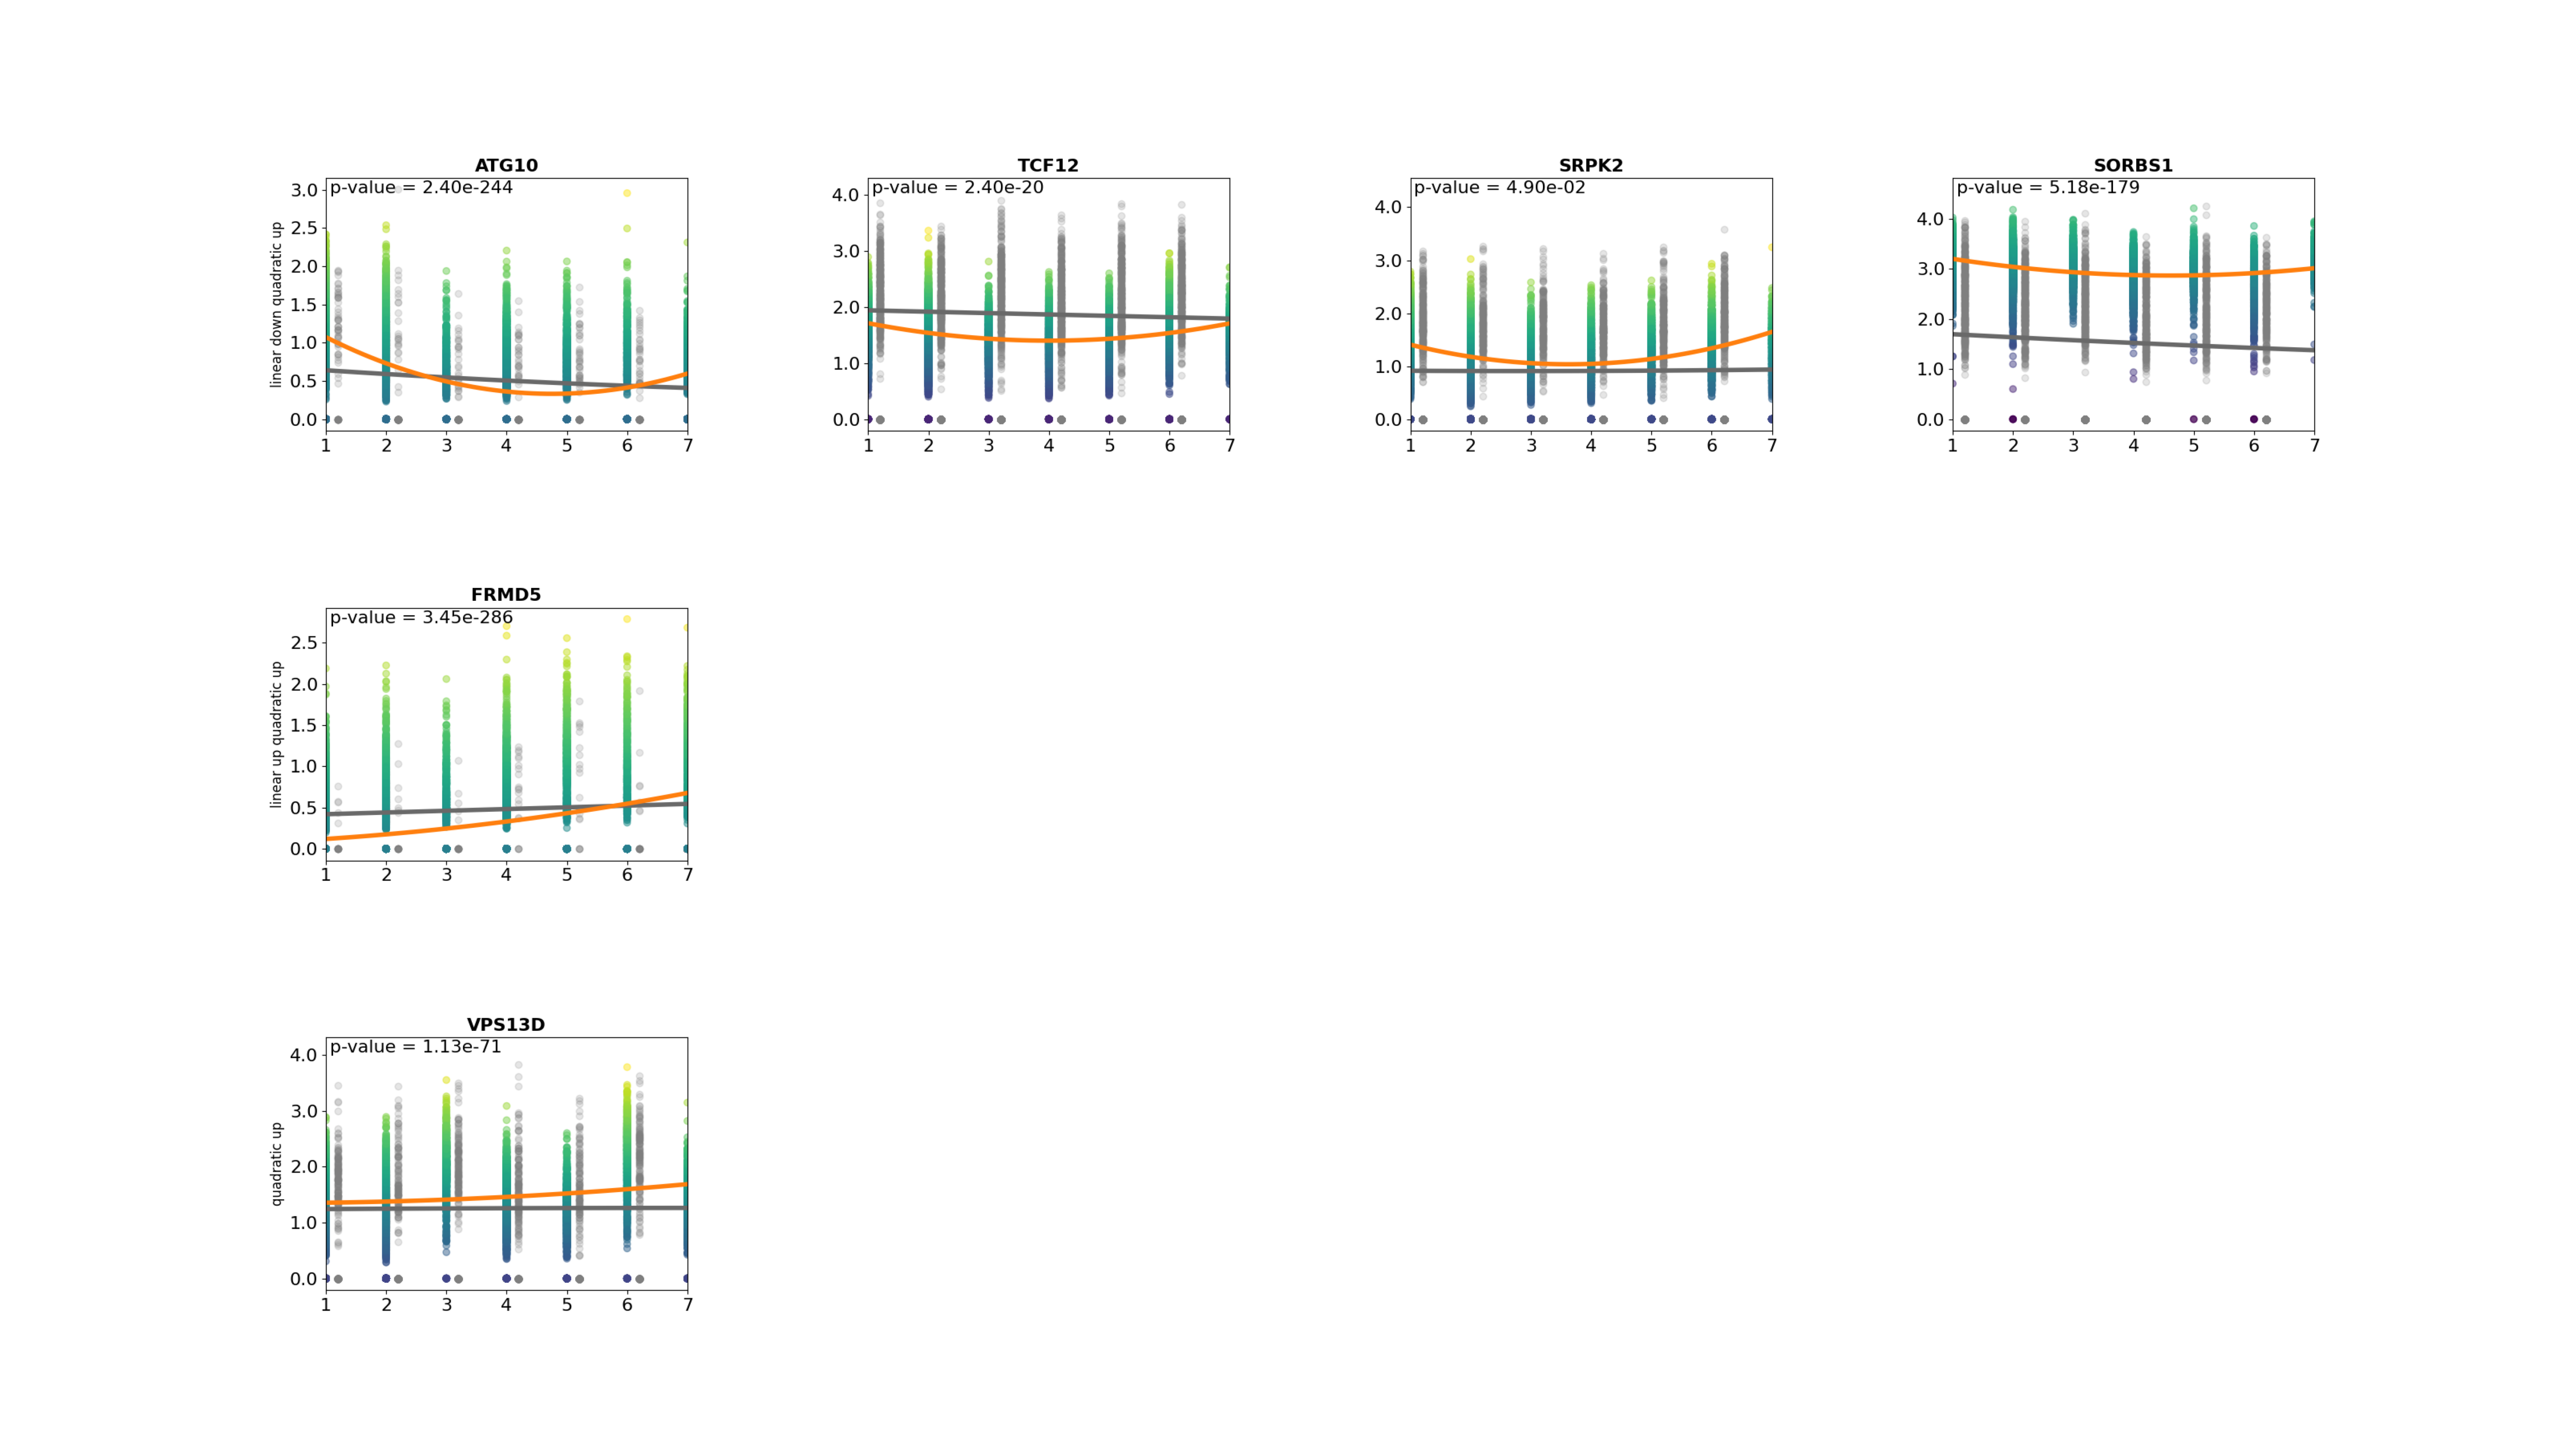

In [23]:
pl.pl.exploring_specific_genes(cluster_name='healthy_CM',gene_list=list(df['gene'][0:20]))

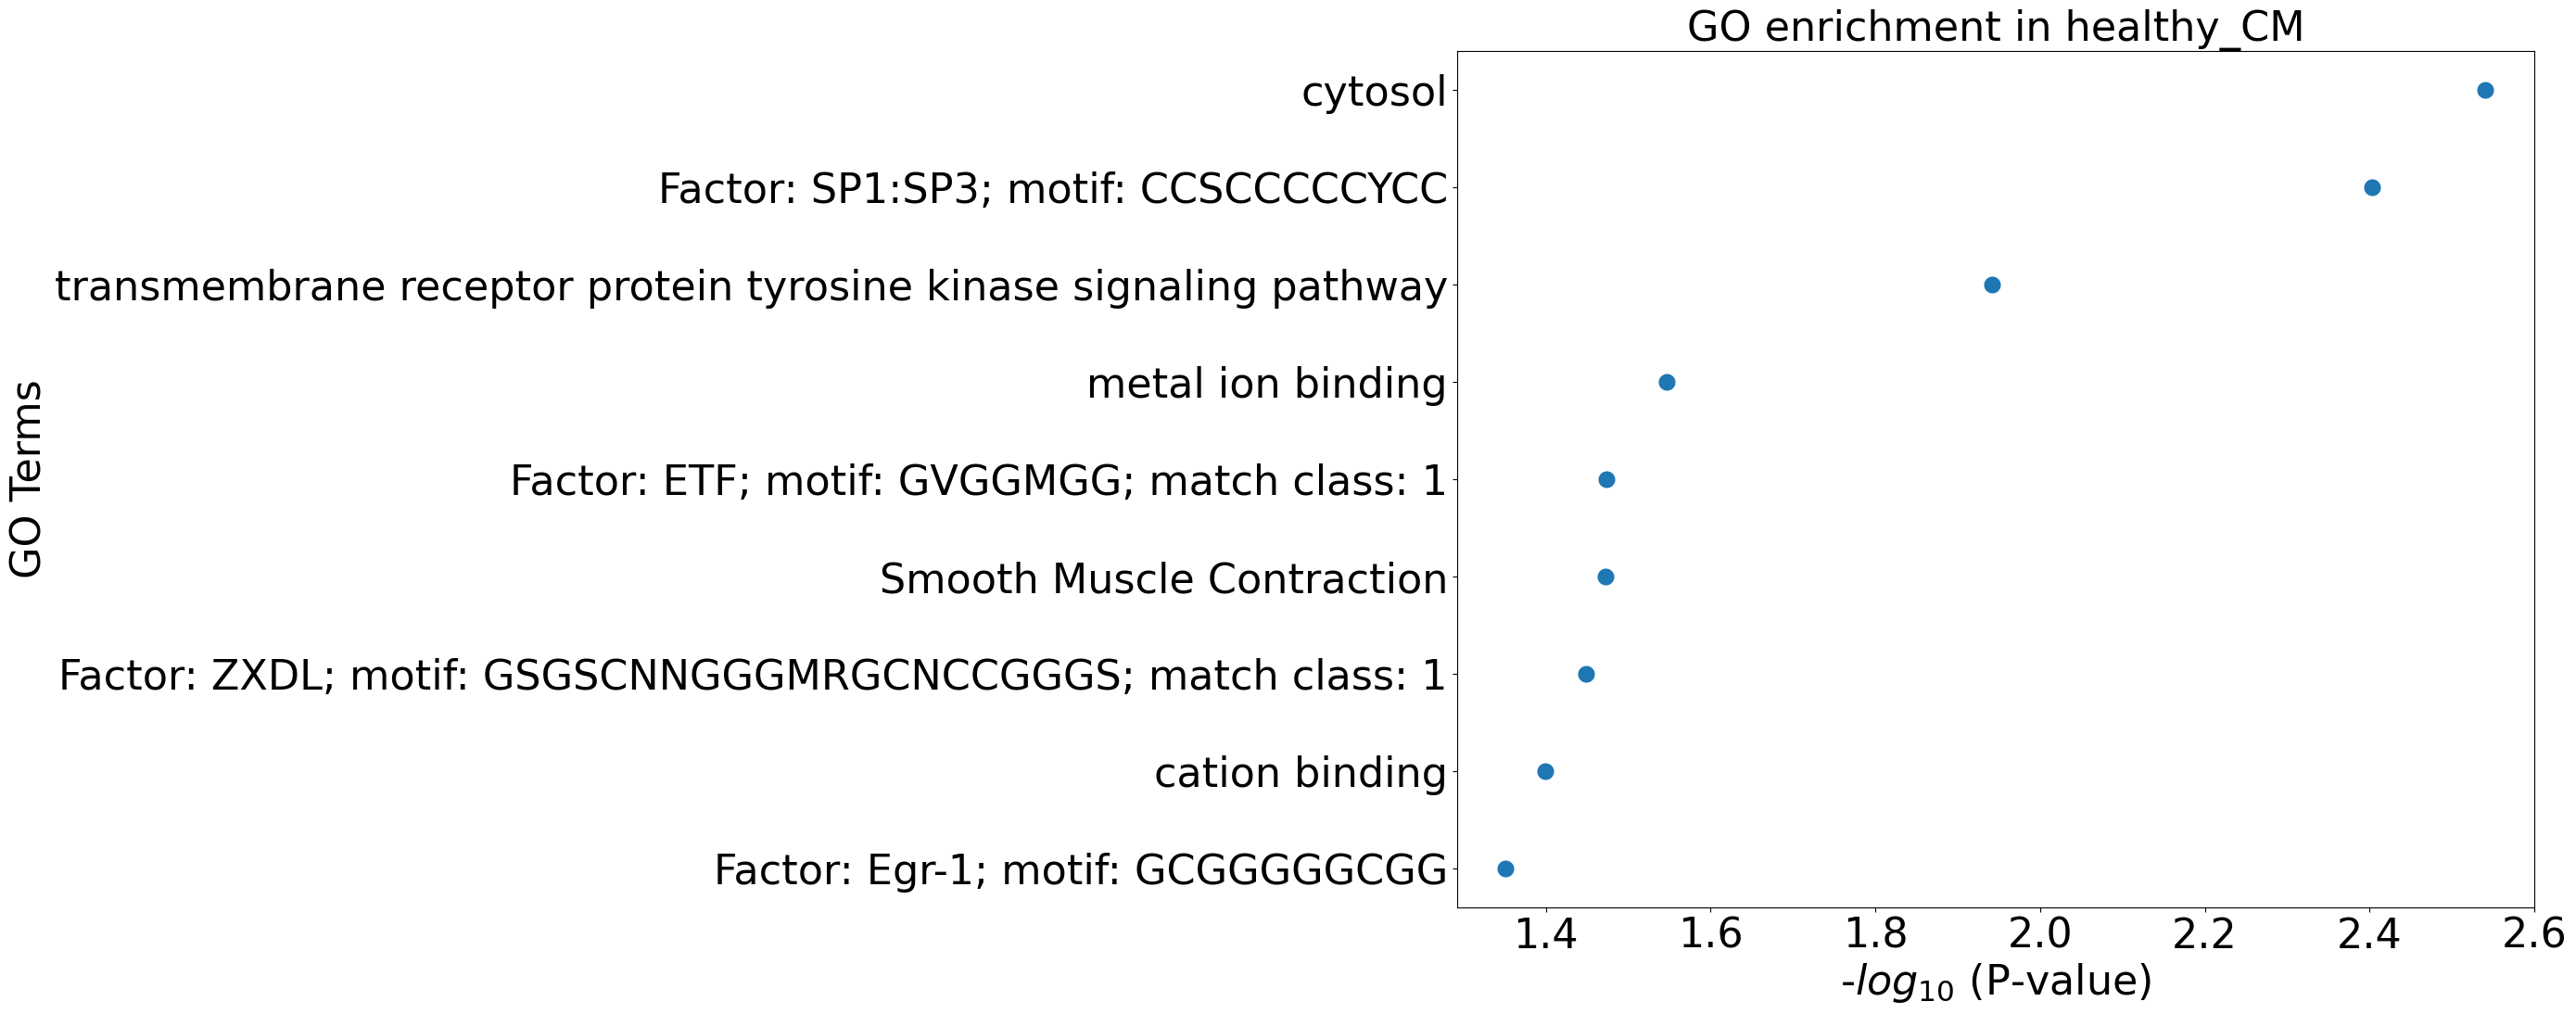

In [24]:
pl.pl.go_enrichment(df,cell_type='healthy_CM')